### Lets consider the general form of an integral of a continuous function


$$I(x,a,b,...)=\int_{x_0}^x f(\tau,a,b,...)d\tau$$

If we want:

$$NN(x)\longrightarrow I(x,a,b,...)$$


We have proved that PINNs can compute the solution of a DE. Then, we can transform the above integral into a DE using the foundamental Teorem of Calculus:



$$\frac{d I}{dx} = f(x,a,b,...)$$

Then, the DE that We should solve is:

$$\frac{d NN}{dx} = f(x,a,b,...)$$



### Example
$$\int \sin(x)dx$$

with $x \in[0, 2\pi]$ 

In [1]:
from neurodiffeq.networks import FCNN # fully-connect neural network
import torch.nn as nn
from neurodiffeq.solvers import Solver1D

import numpy as np
import torch
from neurodiffeq.neurodiffeq import safe_diff as diff
from neurodiffeq.ode import solve, solve_system
from neurodiffeq.solvers import Solver1D
from neurodiffeq.monitors import Monitor1D
from neurodiffeq.conditions import IVP
import matplotlib.pyplot as plt
from neurodiffeq.generators import Generator1D
from itertools import chain
from torch.optim import Adam
from torch.optim import SGD
from scipy.integrate import odeint

In [74]:
#Sistema de ecuaciones
system = lambda u,x:[diff(u,x, order=1)-torch.sin(x)]
init_conditions = [IVP(t_0=0.0, u_0=-1)]


In [75]:
#Training set
ti=0
tf=2*np.pi
t=np.linspace(ti,tf,300)

train_gen = Generator1D(size=100, t_min=ti, t_max=tf, method='uniform')
valid_gen = Generator1D(size=80, t_min=ti, t_max=tf, method='equally-spaced')


In [76]:
# Specify the network architecture
architecture = [FCNN(hidden_units=(40,), actv=nn.Tanh)]

In [77]:
# specify the optimizer
sgd_ho = SGD(
chain.from_iterable(n.parameters() for n in architecture), # this gives all parameters in
lr=0.01, # learning rate
momentum=0.9, # momentum of SGD
)


<IPython.core.display.Javascript object>


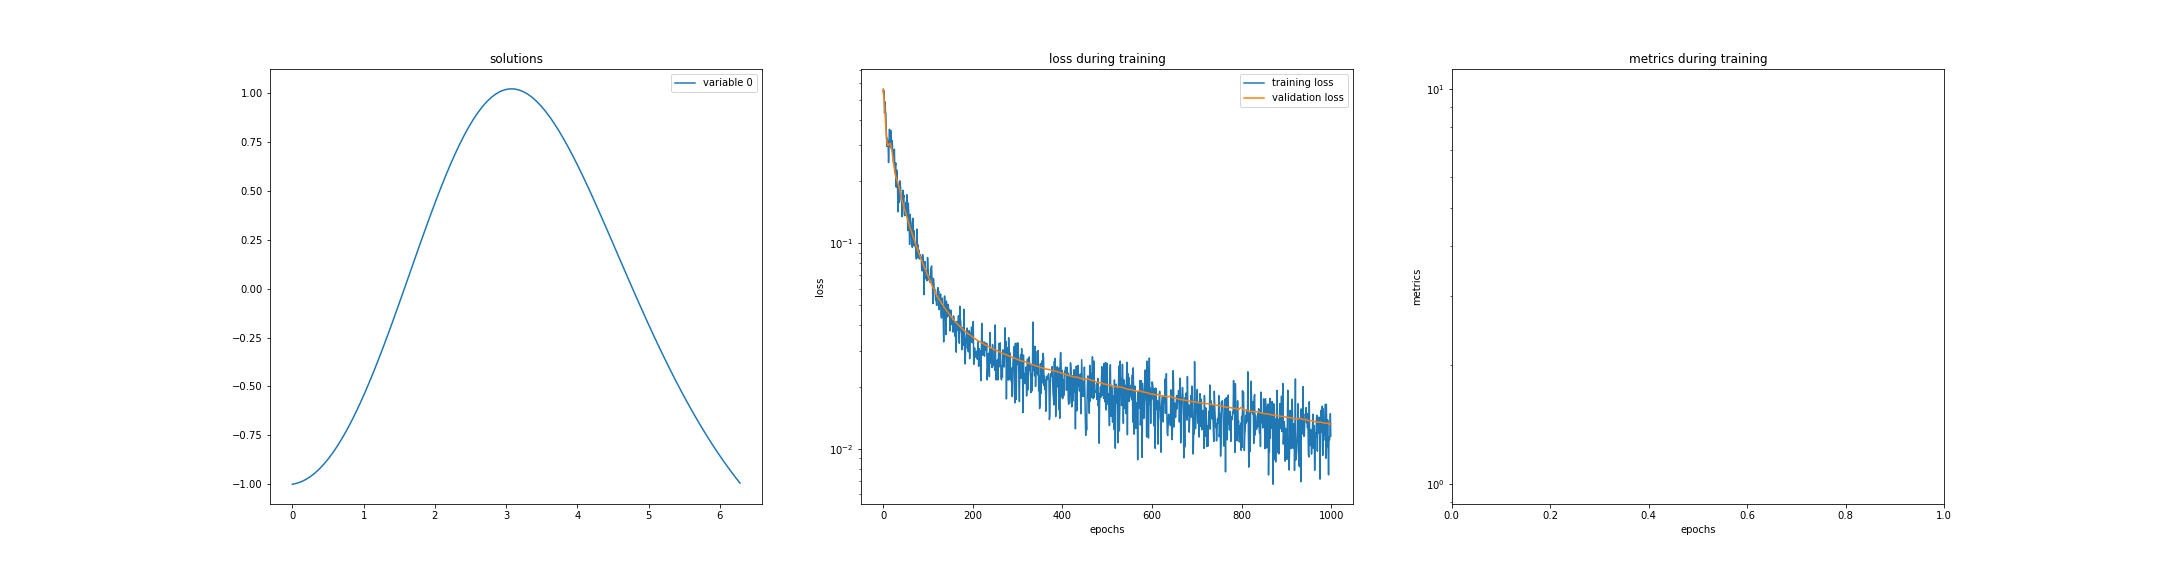

Training Progress:   0%|                                                                      | 0/1000 [00:00<…

In [78]:
#Solving
%matplotlib notebook
#NN params
epochs=1000

# Create a monitor callback
monitor_callback = Monitor1D(t_min=ti, t_max=tf, check_every=100).to_callback()
# Create a solver
compilador = Solver1D(
ode_system=system,
conditions=init_conditions,
t_min=ti,
t_max=tf,
train_generator=train_gen,
valid_generator=valid_gen,
nets=architecture,
optimizer=sgd_ho
)


#solver= solve(system, condition=init_conditions, t_min=ti, t_max=tf,
#max_epochs=epochs,net=net_ho)
# Fit the solver
compilador.fit(max_epochs=epochs, callbacks=[monitor_callback])
# Obtain the solution
solutions = compilador.get_solution()

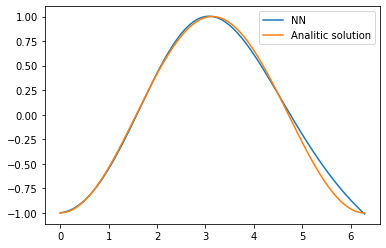

In [79]:
%matplotlib inline
integral=solutions(t,to_numpy=True)
plt.plot(t,integral, label='NN')
plt.plot(t,-np.cos(t), label='Analitic solution')
plt.legend()

# Now. What if We want to solve the DE with the initial conditions over a range?

In [80]:
#Sistema de ecuaciones
system = lambda u,x:[diff(u,x, order=1)-torch.sin(x)]

In [81]:
ti=0
tf=2*np.pi
t=np.linspace(ti,tf,300)

train_gen = Generator1D(size=100, t_min=ti, t_max=tf, method='uniform')
valid_gen = Generator1D(size=80, t_min=ti, t_max=tf, method='equally-spaced')


In [98]:
# Specify the network architecture
architecture = [FCNN(hidden_units=(40,40), actv=nn.Tanh)]

In [99]:
# specify the optimizer
sgd_ho = SGD(
chain.from_iterable(n.parameters() for n in architecture), # this gives all parameters in
lr=0.01, # learning rate
momentum=0.9, # momentum of SGD
)


In [100]:
from neurodiffeq.solvers import BundleSolver1D
from neurodiffeq.conditions import BundleIVP

In [101]:
init_conditions = [BundleIVP(t_0=ti, bundle_conditions={'u_0': 0})]

In [102]:
#Solving
%matplotlib notebook
#NN params
epochs=1000

# Create a monitor callback
monitor_callback = Monitor1D(t_min=ti, t_max=tf, check_every=100).to_callback()
# Create a solver

compilador = BundleSolver1D(ode_system=system,
                        conditions=init_conditions,
                        t_min=ti, t_max=tf,
                        theta_min=-2,
                        theta_max=2)#,
                        #loss_fn=weighted_loss_LCDM,
                        #)
''''
compilador = Solver1D(
ode_system=system,
conditions=init_conditions,
t_min=ti,
t_max=tf,
train_generator=train_gen,
valid_generator=valid_gen,
nets=architecture,
optimizer=sgd_ho
)'''

#solver= solve(system, condition=init_conditions, t_min=ti, t_max=tf,
#max_epochs=epochs,net=net_ho)
# Fit the solver
compilador.fit(max_epochs=epochs, callbacks=[monitor_callback])
# Obtain the solution
solutions = compilador.get_solution()

<IPython.core.display.Javascript object>

Training Progress:   0%|                                                                      | 0/1000 [00:00<…

TypeError: meshgrid() got an unexpected keyword argument 'indexing'